# Análise de Variabilidade Climática e Projeção Futura de Temperaturas

Neste estudo, será realizada uma análise da variabilidade climática com dados de temperatura de uma localidade fictícia ao longo de um período histórico e uma projeção futura. A análise inclui estatísticas descritivas, detecção de anomalias, e a simulação de um cenário futuro com aumento gradual da temperatura.

## Geração de Dados

Primeiramente, uma das etapas mais cruciais para o desenrolar do estudo, foi gerado um conjunto de dados que simula as temperaturas médias mensais de uma cidade ao longo de 10 anos (120 meses). Os dados são centralizados em 15°C, com uma variação sazonal para representar flutuações sazonais e ruído aleatório para adicionar variação realística.

In [153]:
# Imports and constants

import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

YEARS = 10
MONTHS = YEARS * 12
TEMP_AVG = 15
TEMP_SAZON = 10
TEMP_DEV = 2

FUTURE_YEARS = 50
FUTURE_MONTHS = FUTURE_YEARS * 12
TOTAL_MONTHS = MONTHS + FUTURE_MONTHS

ANNUAL_INCREASE = 0.1
MONTHLY_INCREASE = ANNUAL_INCREASE / 12


In [154]:
# Initial temperatures generation

np.random.seed(0)
sazon = TEMP_SAZON * np.sin(TEMP_DEV * np.pi * np.arange(MONTHS) / 2)
temperatures = TEMP_AVG + sazon + np.random.normal(loc=0, scale=TEMP_DEV, size=MONTHS)

temperatures_year = temperatures.reshape(YEARS, 12)
annual_mean = np.mean(temperatures_year)
annual_deviation = np.std(temperatures_year)

## Estatísticas

Análises podem ser feitas a partir dos dados gerados inicialmente, entre elas estão dados como média, desvio padrão e percentis, além da detecção de anomalias.

Mean: 15.27 °C
Standart Deviation: 2.09 °C
Percentile 25%: 13.71 °C
Percentile 50%: 15.26 °C
Percentile 75%: 16.82 °C
Anomalous Months: [[ 3 20 24 33]]


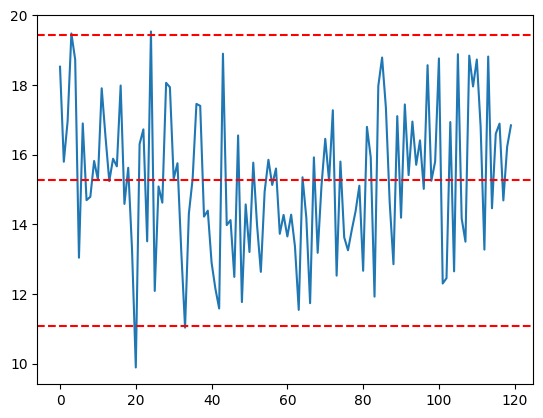

In [155]:
# Data visualization

mean = np.mean(temperatures)
deviation = np.std(temperatures_year)
percentile_25 = np.percentile(temperatures, 25)
percentile_50 = np.percentile(temperatures, 50)
percentile_75 = np.percentile(temperatures, 75)

upper_bound = mean + 2 * deviation
lower_bound = mean - 2 * deviation
anomalies = np.where((temperatures > upper_bound) | (temperatures < lower_bound))

print(f"Mean: {mean:.2f} °C")
print(f"Standart Deviation: {deviation:.2f} °C")
print(f"Percentile 25%: {percentile_25:.2f} °C")
print(f"Percentile 50%: {percentile_50:.2f} °C")
print(f"Percentile 75%: {percentile_75:.2f} °C")
print(f"Anomalous Months: {np.array(anomalies)}")

sb.lineplot(temperatures)
plt.axhline(mean, color='red', linestyle='--', label='Mean')
plt.axhline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.axhline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.show()

## Projeções

Foi simulado um aumento gradual de temperatura de 0,1°C por ano para os próximos 50 anos. A projeção considera tanto a tendência de aumento quanto a variação sazonal.

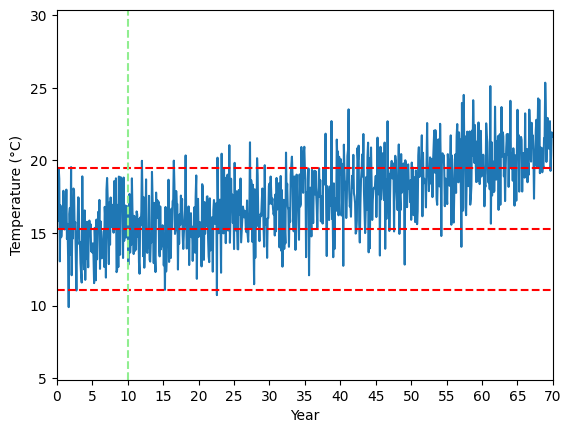

In [156]:
# Future data projection

future_increasing = MONTHLY_INCREASE * np.arange(1, TOTAL_MONTHS + 1)

future_temperatures = temperatures.tolist() + [
    TEMP_AVG + future_increasing[i] +
    TEMP_SAZON * np.sin(2 * np.pi * (i % 12)) + 
    np.random.normal(0, TEMP_DEV)
    for i in range(TOTAL_MONTHS)
]

sb.lineplot(future_temperatures)

plt.axhline(mean, color='red', linestyle='--', label='Mean')
plt.axhline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.axhline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(len(temperatures), color='lightgreen', linestyle='--')

years = np.arange(0, (len(temperatures) + TOTAL_MONTHS) // 12 + 1, step=5)
plt.xticks(years * 12, labels=years)

plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.xlim(0, len(temperatures) + TOTAL_MONTHS)
plt.ylim(min(future_temperatures) - 5, max(future_temperatures) + 5)   

plt.show()